In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Prepare the data. Load breast cancer data

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print(cancer.target[0:20])
print(list(cancer.target_names))
# print(cancer.data[0:5])
print(list(cancer.feature_names))
feature_cols = cancer.feature_names
target_vals = cancer.target_names
#NOTE:
#['malignant', 'benign'] = [0,1] 

['malignant', 'benign']
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [5]:
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn import metrics

# Convert the scientific notation of an array into a human readable form
np.set_printoptions(suppress=True)

random.seed(42)   

X = cancer.data 
y = cancer.target

# Split the dataset into train and test using 20% threshold
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
### Fitting the model ###
cancer_cls = DecisionTreeClassifier(max_depth=4)
cancer_cls.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

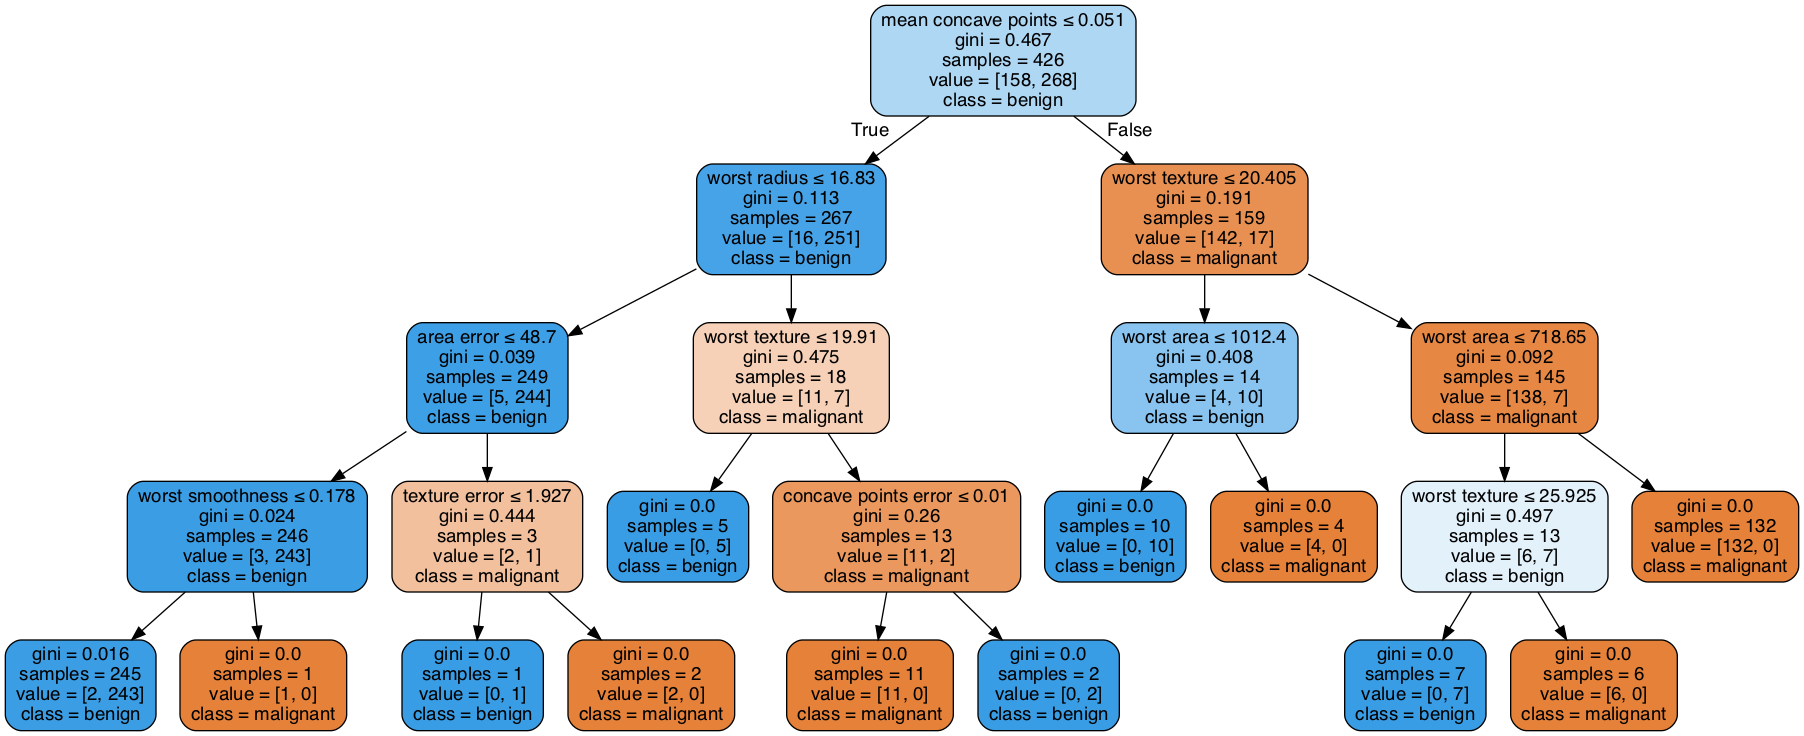

In [8]:
### The pretty stuff ####

# Create a fake file object
dot_data = StringIO()

# Export a decision tree in DOT format into the fake file object
export_graphviz(cancer_cls, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=target_vals)

# Create a graph using the DOT format
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Export graph into a PNG file
graph.write_png('cancer_tree.png')

# Display the image
Image(graph.create_png())

In [14]:
#Predict the response for test dataset
y_pred = cancer_cls.predict(X_test)

In [15]:
# Calculate accuracy, to see how often the classifier is correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.916083916083916
